# Statistical Analysis

In [4]:
import pandas as pd
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

import matplotlib.pyplot as plt

In [38]:
# import data
train_data = pd.read_csv('MNIST_train.csv', index_col='ID')
val_data   = train_data[55000:]
train_data = train_data[:55000]
test_data  = pd.read_csv('MNIST_test.csv', index_col='ID')

train_data_unlabeled = train_data.drop(' Label', axis=1)
val_data_unlabeled   = val_data.drop(' Label', axis=1)
test_data_unlabeled  = test_data.drop(' Label', axis=1)

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


**Naive statistical analysis**
Here, we just compute:
- prediction accuracy for each number, averaged over all algorithms
- accuracy of each algorithm
- accuracy of each algorithm for each number

In [109]:
# compute average accuracy
correct = train_data
correct['num_correct'] = train_data_unlabeled.apply(lambda row: row.sum(),1)

average_accuracy = pd.DataFrame(index=['num_correct'])
for i in range(10):
    average_accuracy[i] = correct.loc[correct[' Label'] == i]['num_correct'].mean()

average_accuracy

,0,1,2,3,4,5,6,7,8,9
num_correct,18.862716,19.021732,17.844648,17.967983,18.147296,17.446101,18.50975,19.20221,17.26694,17.761068


The median accuracy is: 18.057639225541912
The mean accuracy is:   18.203044416227115


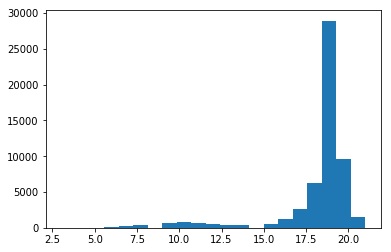

In [117]:
print('The median accuracy is: {}'.format(average_accuracy.median(axis=1)[0]))
print('The mean accuracy is:   {}'.format(average_accuracy.mean(axis=1)[0]))
plt.hist(correct['num_correct'], bins=21)
plt.show()

In [119]:
# compute accuracy of each algorithm
pd.DataFrame(train_data_unlabeled.mean()).transpose()

,ALG1,ALG2,ALG3,ALG4,ALG5,ALG6,ALG7,ALG8,ALG9,ALG10,...,ALG12,ALG13,ALG14,ALG15,ALG16,ALG17,ALG18,ALG19,ALG20,ALG21
0,0.890491,0.928382,0.997109,0.928055,0.999109,0.131473,0.871055,0.174564,0.927764,0.957655,...,0.926127,0.924655,1.0,1.0,0.885,0.929709,0.923873,0.999109,0.983309,0.996382


## Basic Classifier

Here, we create a CNN that attempts to predict the percent of classifiers that correctly classified an image. 

In [156]:
# Data
def aggregator(row):
    return row.sum()

train_x = mnist.train.images
train_y = train_data_unlabeled.apply(aggregator, axis=1).reset_index().drop('ID', axis=1)

val_x = mnist.validation.images
val_y = val_data_unlabeled.apply(aggregator,axis=1).reset_index().drop('ID', axis=1)

test_x = mnist.test.images
test_y = test_data_unlabeled.apply(aggregator, axis=1).reset_index().drop('ID', axis=1)

In [ ]:
def mlp(features, labels, mode):
    dense1 = tf.layers.dense(inputs=features, units=1024)
    dense2 = tf.layers.dense(inputs=dense1, units=21)
    predictions = tf.layers.dense(inputs=dense2, units=1)
    
    

In [160]:
def cnn(features, labels, mode):
    """Heavily borrowed from https://www.tensorflow.org/tutorials/layers#building_the_cnn_mnist_classifier
    """
    input_layer = tf.reshape(features, [-1,28,28,-1])
    conv1 = tf.layers.conv2d(inputs=input_layer, filters=32, kernel_size=[5,5],
                            padding='same', activation=tf.nn.relu)
    pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2], strides=2)
    conv2 = tf.layers.conv2d(inputs=pool1, filters=64, kernel_size=[5, 5],
                             padding="same", activation=tf.nn.relu)
    pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2], strides=2)
    pool2_flat = tf.reshape(pool2, [-1, 7 * 7 * 64])
    dense = tf.layers.dense(inputs=pool2_flat, units=1024, activation=tf.nn.relu)
    dropout = tf.layers.dropout(inputs=dense, rate=0.4, training=mode == tf.estimator.ModeKeys.TRAIN)
    predictions = tf.layers.dense(inputs=dropout, units=1)
    
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode=mode, predictions=predictions)
    
    loss = tf.losses.mean_squared_error(labels, predictions)
    
    if mode == tf.estimator.ModeKeys.TRAIN:
        optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
        train_op = optimizer.minimize(loss=loss, global_step=tf.train.get_global_step())
        return tf.estimator.EstimatorSpec(mode=mode, loss=loss, train_op=train_op)

    eval_metric_ops = {
      "accuracy": tf.metrics.accuracy(labels=labels, predictions=predictions["classes"])}
    return tf.estimator.EstimatorSpec(mode=mode, loss=loss, eval_metric_ops=eval_metric_ops)


In [161]:
cnn(train_x, train_y, tf.estimator.ModeKeys.PREDICT)

ValueError: The channel dimension of the inputs should be defined. Found `None`.

In [53]:
dim_reduced = pca.fit_transform(mnist.train.images)

In [52]:
tsne = TSNE()

In [60]:
embed = tsne.fit_transform(dim_reduced[:2000])

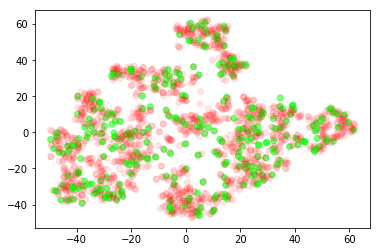

In [86]:
plt.scatter(embed[:,0],embed[:,1], c=color)
plt.show()

In [76]:
color = new_data['easy'][:2000]

In [85]:
c = {1: [1,0,0,0.1], 0:[0,1,0,0.5]}
color = new_data['easy'][:2000].apply(lambda b: c[b])

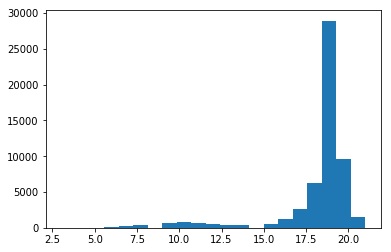

In [106]:
plt.hist(new_data['percent_correct'], bins=21)
plt.show()

In [163]:
train_y

,0
0,19
1,21
2,21
3,21
4,21
5,21
6,20
7,21
8,21
9,20
